# 小组赛分析

In [54]:
import pandas as pd

result_pro = pd.read_csv(r"D:\worldcup\result.csv", encoding='gbk')
result_pro['competition_time'] = pd.to_datetime(result_pro['competition_time'])
result_pro['主客'] = result_pro['team1'].str.cat(result_pro['team2'], sep=',')
result_pro = result_pro.drop(['team1','team2'], axis=1).reset_index(drop=True)
result_pro.head()

,competition_time,净胜球,主客
0,2018-06-14 23:00:00,0.824845,"俄罗斯,沙特阿拉伯"
1,2018-06-15 20:00:00,-0.275923,"埃及,乌拉圭"
2,2018-06-20 02:00:00,0.299574,"俄罗斯,埃及"
3,2018-06-20 23:00:00,0.498543,"乌拉圭,沙特阿拉伯"
4,2018-06-25 22:00:00,-0.141609,"沙特阿拉伯,埃及"


In [55]:
import re

result_group = pd.read_csv(r"D:\worldcup\world_cup_group.csv", encoding='gbk')
result_group['时间'] = pd.to_datetime(result_group['时间'])
result_group['主'] = [float(re.search(r'^[1-9]\d*\.\d*|0\.\d*[1-9]\d*$', x).group()) for x in result_group['主']]
result_group['和'] = [float(re.search(r'^[1-9]\d*\.\d*|0\.\d*[1-9]\d*$', x).group()) for x in result_group['和']]
result_group['客'] = [float(re.search(r'^[1-9]\d*\.\d*|0\.\d*[1-9]\d*$', x).group()) for x in result_group['客']]
result_group['真实净胜球'] = [float(x.split(':')[0])-float(x.split(':')[1]) for x in result_group['比分']]
result_group['主客'] = result_group['主队'].str.cat(result_group['客队'], sep=',')
result_group.head()

,赛事,时间,主队,主,和,客,客队,比分,真实净胜球,主客
0,世界杯分,2018-06-29 02:00:00,英格兰,2.551,2.936,3.273,比利时,0:01,-1.0,"英格兰,比利时"
1,世界杯分,2018-06-29 02:00:00,巴拿马,4.170,3.577,1.923,突尼斯,1:02,-1.0,"巴拿马,突尼斯"
2,世界杯分,2018-06-28 22:00:00,塞内加尔,4.710,3.607,1.809,哥伦比亚,0:01,-1.0,"塞内加尔,哥伦比亚"
3,世界杯分,2018-06-28 22:00:00,日本,3.062,3.165,2.577,波兰,0:01,-1.0,"日本,波兰"
4,世界杯分,2018-06-28 02:00:00,瑞士,1.629,3.597,6.872,哥斯达黎加,2:02,0.0,"瑞士,哥斯达黎加"


In [58]:
result_all = pd.merge(result_pro, result_group, on = '主客')
result_all.head()

,competition_time,净胜球,主客,赛事,时间,主队,主,和,客,客队,比分,真实净胜球
0,2018-06-14 23:00:00,0.824845,"俄罗斯,沙特阿拉伯",世界杯分,2018-06-14 23:00:00,俄罗斯,1.421,4.331,9.181,沙特阿拉伯,5:00,5.0
1,2018-06-15 20:00:00,-0.275923,"埃及,乌拉圭",世界杯分,2018-06-15 20:00:00,埃及,6.833,3.776,1.578,乌拉圭,0:01,-1.0
2,2018-06-20 02:00:00,0.299574,"俄罗斯,埃及",世界杯分,2018-06-20 02:00:00,俄罗斯,1.959,3.357,4.242,埃及,3:01,2.0
3,2018-06-20 23:00:00,0.498543,"乌拉圭,沙特阿拉伯",世界杯分,2018-06-20 23:00:00,乌拉圭,1.210,6.435,16.375,沙特阿拉伯,1:00,1.0
4,2018-06-25 22:00:00,-0.141609,"沙特阿拉伯,埃及",世界杯分,2018-06-25 22:00:00,沙特阿拉伯,4.989,3.550,1.782,埃及,2:01,1.0


相关系数： [[ 1.          0.51829478]
 [ 0.51829478  1.        ]]


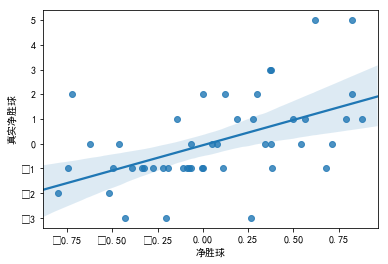

In [59]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

plt.rcParams['font.sans-serif']=['SimHei']
sns.regplot(x="净胜球", y="真实净胜球", data=result_all)
np.corrcoef(result_all.loc[:, ["净胜球", "真实净胜球"]],rowvar=0)
print('相关系数：', np.corrcoef(result_all.loc[:, ["净胜球", "真实净胜球"]],rowvar=0))

In [60]:
for i in range(len(result_all)):
    if result_all.loc[i, '净胜球'] > 0.1:
        if result_all.loc[i, '真实净胜球'] > 0:
            result_all.loc[i, 'money'] = result_all.loc[i, '主']
    if result_all.loc[i, '净胜球'] < -0.1:
        if result_all.loc[i, '真实净胜球'] < 0:
            result_all.loc[i, 'money'] = result_all.loc[i, '客']
    else:
        if result_all.loc[i, '真实净胜球'] == 0:
            result_all.loc[i, 'money'] = result_all.loc[i, '和']
result_all = result_all.fillna(0)
result_all.head()

,competition_time,净胜球,主客,赛事,时间,主队,主,和,客,客队,比分,真实净胜球,money
0,2018-06-14 23:00:00,0.824845,"俄罗斯,沙特阿拉伯",世界杯分,2018-06-14 23:00:00,俄罗斯,1.421,4.331,9.181,沙特阿拉伯,5:00,5.0,1.421
1,2018-06-15 20:00:00,-0.275923,"埃及,乌拉圭",世界杯分,2018-06-15 20:00:00,埃及,6.833,3.776,1.578,乌拉圭,0:01,-1.0,1.578
2,2018-06-20 02:00:00,0.299574,"俄罗斯,埃及",世界杯分,2018-06-20 02:00:00,俄罗斯,1.959,3.357,4.242,埃及,3:01,2.0,1.959
3,2018-06-20 23:00:00,0.498543,"乌拉圭,沙特阿拉伯",世界杯分,2018-06-20 23:00:00,乌拉圭,1.210,6.435,16.375,沙特阿拉伯,1:00,1.0,1.210
4,2018-06-25 22:00:00,-0.141609,"沙特阿拉伯,埃及",世界杯分,2018-06-25 22:00:00,沙特阿拉伯,4.989,3.550,1.782,埃及,2:01,1.0,0.000


In [61]:
rate = np.mean(result_all['money'])
print('你能赚多少：',rate)
print('利率：',(rate-1))


你能赚多少： 1.6328936170212762
利率： 0.6328936170212762


# 淘汰赛八强预测

In [63]:
historical_record = pd.read_csv(r"D:\worldcup\historical_record.csv")
del historical_record['id']
del historical_record['create_time']
del historical_record['update_time']
historical_record = historical_record.drop_duplicates() 
historical_record.loc[(historical_record["team_name"] == '法国') & ((historical_record["home_team"] == '西班牙') | (historical_record["visiting_team"] == '西班牙'))]

,team_id,team_name,home_team,visiting_team,type,time,result,foul,yellow_card,red_card,possession,shot,pass,pass_rate,most,score
665,10,法国,法国,西班牙,国际友谊,2017/3/29 03:00:00,0-2,17,2,0,0.41,8(2),439(371),0.85,1,4
699,10,法国,法国,西班牙,国际友谊,2014/9/5 03:00:00,1-0,9,0,0,0.42,10(5),0(0),0.00,0,2
717,10,法国,法国,西班牙,欧洲预选,2013/3/27 04:00:00,0-1,21,3,1,0.24,15(3),0(0),0.00,0,5
721,10,法国,西班牙,法国,欧洲预选,2012/10/17 03:00:00,1-1,10,2,2,0.50,7(3),0(0),0.00,0,3
725,10,法国,西班牙,法国,欧洲杯,2012/6/24 02:45:00,2-0,12,2,1,0.45,4(1),0(0),0.00,0,3


In [82]:
historical_group = result_group.rename(columns={'主队':'home_team', '客队':'visiting_team', '赛事':'type', '时间':'time', '比分':'result'}).loc[:, ['home_team', 'visiting_team', 'type', 'time', 'result']]
historical_group['result'] = historical_group['result'].str.replace(':', '-')
historical_group['team_name'] = historical_group['home_team']
historical_group1 = pd.DataFrame(historical_group.values, columns=['home_team', 'visiting_team', 'type', 'time', 'result', 'team_name'])
historical_group['team_name'] = historical_group['visiting_team']
historical_group2 = pd.DataFrame(historical_group.values, columns=['home_team', 'visiting_team', 'type', 'time', 'result', 'team_name'])

historical_record_group = pd.concat([historical_group1, historical_group2, historical_record])

historical_record_group.to_csv(r"D:\worldcup\historical_record_group.csv", index=False)
historical_record_group.head()

,foul,home_team,most,pass,pass_rate,possession,red_card,result,score,shot,team_id,team_name,time,type,visiting_team,yellow_card
0,NaN,英格兰,NaN,NaN,NaN,NaN,NaN,0-01,NaN,NaN,NaN,英格兰,2018-06-29 02:00:00,世界杯分,比利时,NaN
1,NaN,巴拿马,NaN,NaN,NaN,NaN,NaN,1-02,NaN,NaN,NaN,巴拿马,2018-06-29 02:00:00,世界杯分,突尼斯,NaN
2,NaN,塞内加尔,NaN,NaN,NaN,NaN,NaN,0-01,NaN,NaN,NaN,塞内加尔,2018-06-28 22:00:00,世界杯分,哥伦比亚,NaN
3,NaN,日本,NaN,NaN,NaN,NaN,NaN,0-01,NaN,NaN,NaN,日本,2018-06-28 22:00:00,世界杯分,波兰,NaN
4,NaN,瑞士,NaN,NaN,NaN,NaN,NaN,2-02,NaN,NaN,NaN,瑞士,2018-06-28 02:00:00,世界杯分,哥斯达黎加,NaN


In [104]:
import pandas as pd
import datetime
import numpy as np
from sklearn.linear_model import LinearRegression

alg = LinearRegression()
alg.fit(np.array(result_all['净胜球']).reshape(-1, 1), np.array(result_all['真实净胜球']).reshape(-1, 1))

def sigmoid(inX):  
    return 1.0/(1+np.exp(-inX))  

def goal_fiff(team1, team2, competition_time):
    #historical_record = pd.read_csv(r"D:\worldcup\historical_record.csv")
    historical_record = pd.read_csv(r"D:\worldcup\historical_record.csv")
    del historical_record['id']
    del historical_record['create_time']
    del historical_record['update_time']
    #去重
    historical_record = historical_record.drop_duplicates().reset_index(drop = True)
    #处理result为净胜球    
    for i in range(len(historical_record)):
        num1 = historical_record.loc[i, 'result'].split('-')[0]
        num2 = historical_record.loc[i, 'result'].split('-')[1]
        if historical_record.loc[i, 'home_team'] == historical_record.loc[i, 'team_name']:
            historical_record.loc[i, 'result'] = int(num1) - int(num2)
        else:
            historical_record.loc[i, 'result'] = int(num2) - int(num1)
    #选出team1和team2
    historical_record_1 = historical_record.loc[historical_record["team_name"] == team1]
    historical_record_2 = historical_record.loc[historical_record["team_name"] == team2]
    e_df = set(historical_record_1['home_team'].tolist()).union(set(historical_record_1['visiting_team'].tolist()))
    s_df = set(historical_record_2['home_team'].tolist()).union(set(historical_record_2['visiting_team'].tolist()))
    e_union_s = e_df.intersection(s_df)
    #print(e_union_s)
    #选出即和team1交手又和team2交手的队伍
    int_inf_2 = historical_record_2.loc[historical_record_2["visiting_team"].isin(e_union_s) | historical_record_2["home_team"].isin(e_union_s)]
    int_inf_1 = historical_record_1.loc[historical_record_1["visiting_team"].isin(e_union_s) | historical_record_1["home_team"].isin(e_union_s)]
    concat_e_s = pd.concat([int_inf_1, int_inf_2]).reset_index(drop=True)  
    
    #print(e_df)
    #设置比赛开始时间
    concat_e_s_sle = concat_e_s.loc[: , ['team_name', 'home_team', 'visiting_team', 'time', 'result', 'score']]
    concat_e_s_sle['time'] = pd.to_datetime(concat_e_s_sle['time'])
    start_date_str = competition_time
    start_date = datetime.datetime.strptime(start_date_str, '%Y/%m/%d %H:%M')
    #sigmode处理时间，得出权重
    concat_e_s_sle['sec_from_start_to_data'] = (concat_e_s_sle.loc[:, 'time']-start_date).dt.total_seconds()  
    concat_e_s_sle['sfstd_non'] = concat_e_s_sle.loc[:, ['sec_from_start_to_data']].apply(lambda x: (x - np.mean(x)) / (np.std(x)))

    concat_e_s_sle['wight'] = sigmoid(concat_e_s_sle['sfstd_non'])
    #净胜球与权重结合
    concat_e_s_sle['result_wight'] = concat_e_s_sle['result'] * concat_e_s_sle['wight']
    #计算结合平均值
    union_1 = pd.DataFrame({'team_name':[],'oppose_team':[],'mean_result_1':[]})
    union_2 = pd.DataFrame({'team_name':[],'oppose_team':[],'mean_result_2':[]})
    for i in e_union_s:
        if i != team1:
            mean_1 = concat_e_s_sle.loc[(concat_e_s_sle['team_name'] == team1)&((concat_e_s_sle['home_team'] == i) | (concat_e_s_sle['visiting_team'] == i))].loc[:, 'result_wight'].mean()
            union_1 = pd.concat([union_1, pd.DataFrame({'team_name':[team1],'oppose_team':[i],'mean_result_1':[mean_1]})])
        if i != team2:
            mean_2 = concat_e_s_sle.loc[(concat_e_s_sle['team_name'] == team2)&((concat_e_s_sle['home_team'] == i) | (concat_e_s_sle['visiting_team'] == i))].loc[:, 'result_wight'].mean()
            union_2 = pd.concat([union_2, pd.DataFrame({'team_name':[team2],'oppose_team':[i],'mean_result_2':[mean_2]})])
        
        
    union = union_1.merge(union_2, on = 'oppose_team')
    #print(union)
    
    #team1与team2直接对抗结果
    mean_1_2 = concat_e_s_sle.loc[(concat_e_s_sle['team_name'] == team1)&((concat_e_s_sle['home_team'] == team2) | (concat_e_s_sle['visiting_team'] == team2))].loc[:, 'result_wight'].mean()
    op_1_2 = pd.DataFrame({'team_name':[team1],'oppose_team':[team2],'mean_result_1':[mean_1_2]})
    mean_2_1 = concat_e_s_sle.loc[(concat_e_s_sle['team_name'] == team2)&((concat_e_s_sle['home_team'] == team1) | (concat_e_s_sle['visiting_team'] == team1))].loc[:, 'result_wight'].mean()
    op_2_1 = pd.DataFrame({'team_name':[team2],'oppose_team':[team1],'mean_result_2':[mean_2_1]})
    #合并所有
    union_all = pd.concat([union, op_2_1, op_1_2]).fillna(0)
    #print(pd.concat([union, op_2_1, op_1_2]).fillna(0))
    
    res = (union_all['mean_result_1'] - union_all['mean_result_2']).mean()
    #修改
    res = alg.predict(np.array(res).reshape(-1, 1))[0,0]
    res_e_s = pd.DataFrame({'team1':[team1], 'team2':[team2], 'competition_time':[competition_time], '净胜球':[res]})
    return res_e_s

In [105]:
competition_process = pd.read_csv(r"D:\worldcup\competition_process_8.csv", encoding='gbk', names =['competition_time','team'])
competition_process['team1'] = [x.replace('?','').split('-')[0].strip() for x in competition_process['team']]
competition_process['team2'] = [x.replace('?','').split('-')[1].strip() for x in competition_process['team']]
del competition_process['team']

result = pd.DataFrame({'team1':[] , 'team2':[], 'competition_time':[], '净胜球':[]})
for i in range(len(competition_process)):
    result = pd.concat([result, goal_fiff(competition_process.loc[i, 'team1'], competition_process.loc[i, 'team2'], competition_process.loc[i, 'competition_time'])])
    #print(i)
result

,competition_time,team1,team2,净胜球
0,2018/6/30 22:00,法国,阿根廷,0.768492
0,2018/7/1 2:00,乌拉圭,葡萄牙,-0.896691
0,2018/7/1 22:00,西班牙,俄罗斯,1.288980
0,2018/7/2 2:00,克罗地亚,丹麦,-0.152513
0,2018/7/2 22:00,巴西,墨西哥,0.936298
0,2018/7/3 2:00,比利时,日本,1.118675
0,2018/7/3 22:00,瑞典,瑞士,0.349407
0,2018/7/4 2:00,哥伦比亚,英格兰,0.096202
